# Creating a grid

## The Grid object

In [1]:
from roms_tools import Grid

We can create a ROMS grid, mask, topography, and vertical coordinate system by creating an instance of the `Grid` class. In this example our grid spans the Nordic Seas and has a horizontal resolution of 10km and 100 vertical layers.

In [2]:
%%time

grid = Grid(
    nx=250,  # number of grid points in x-direction
    ny=250,  # number of grid points in y-direction
    size_x=2500,  # domain size in x-direction (in km)
    size_y=2500,  # domain size in y-direction (in km)
    center_lon=-15,  # longitude of the center of the domain
    center_lat=65,  # latitude of the center of the domain
    rot=-30,  # rotation of the grid (in degrees)
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    N=100,  # number of vertical layers
    verbose=True,
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 0.094 seconds
INFO - ========================================================================================================
INFO - === Creating the mask ===
INFO - Total time: 0.390 seconds
INFO - ========================================================================================================
INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.429 seconds
INFO - Regridding the topography: 0.503 seconds
INFO - Smoothing the topography globally: 0.011 seconds
INFO - Smoothing the topography locally: 1.973 seconds
INFO - Total time: 6.672 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ==============================================

CPU times: user 4.31 s, sys: 487 ms, total: 4.79 s
Wall time: 7.19 s


We generated the grid with verbose mode enabled, allowing us to see which steps were taken and how long each took. As you can see from the printed output, the four main steps are as follows:

I. [Creating the horizontal grid](https://roms-tools.readthedocs.io/en/latest/methods.html#horizontal-grid)

II. [Creating the mask](https://roms-tools.readthedocs.io/en/latest/methods.html#mask)

III. [Generating the topography](https://roms-tools.readthedocs.io/en/latest/methods.html#topography)

IV. [Preparing the vertical coordinate system](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system)

We will explore steps III. and IV. in more detail later. For now, let's examine the grid variables that were created, which can be found in the `xarray.Dataset` object returned by the `.ds` property.

In [3]:
grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.2 57.19 ... 64.59 64.51
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.76 22.85
    lat_u         (eta_rho, xi_u) float64 506kB 57.19 57.19 ... 64.63 64.55
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 316.2 ... 22.71 22.8
    lat_v         (eta_v, xi_rho) float64 506kB 57.24 57.24 ... 64.57 64.49
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.67 22.76
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.15 57.14 ... 64.49
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.7 316.1 ... 22.99
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05782 -0.05782 ... -1.104
    f             (eta_rho, xi_rho) float64 508kB 0.0001222 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001013 ... 0.0001013
    pn            (eta_rho, xi_rho) float64 508kB 0.000102 0.000102 ... 0.000102
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.412e+03 3.412e+03 ... 5.0
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:               ROMS grid created by ROMS-Tools
    roms_tools_version:  2.6.3.dev49+g5688aca
    size_x:              2500
    size_y:              2500
    center_lon:          -15
    center_lat:          65
    rot:                 -30
    topography_source:   SRTM15
    hmin:                5.0
    theta_s:             5.0
    theta_b:             2.0
    hc:                  300.0

To visualize the grid we have just created, we can use the `.plot` method.

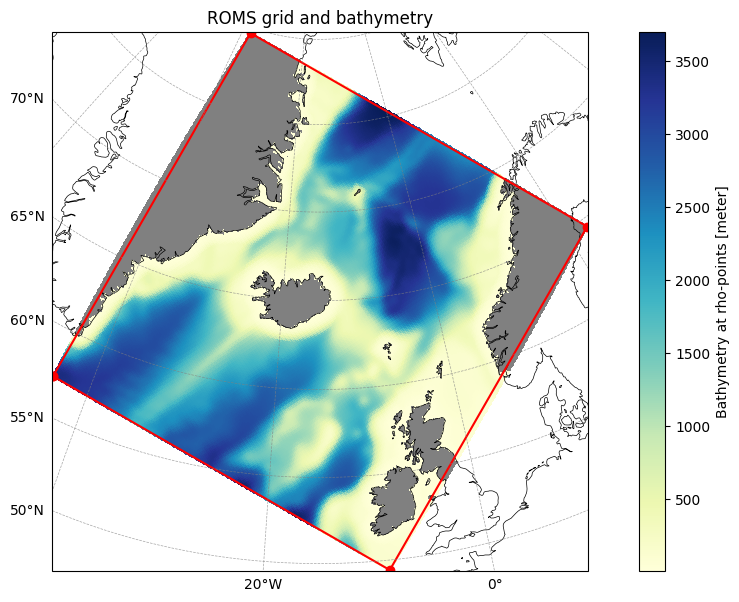

In [4]:
grid.plot()

### Saving as NetCDF or YAML file

Once we are happy with our grid, we can save it as a netCDF file via the `.save` method:

In [5]:
filepath = "/pscratch/sd/n/nloose/grids/my_roms_grid.nc"

In [6]:
grid.save(filepath)

INFO - Writing the following NetCDF files:
/pscratch/sd/n/nloose/grids/my_roms_grid.nc


[PosixPath('/pscratch/sd/n/nloose/grids/my_roms_grid.nc')]

We can also export the grid parameters to a YAML file. This gives us a more storage-effective way to save and share input data made with `ROMS-Tools`. The YAML file can be used to recreate the same grid object later.

In [7]:
yaml_filepath = "/pscratch/sd/n/nloose/grids/my_roms_grid.yaml"

In [8]:
grid.to_yaml(yaml_filepath)

These are the contents of the written YAML file.

In [9]:
# Open and read the YAML file
with open(yaml_filepath, "r") as file:
    file_contents = file.read()

# Print the contents
print(file_contents)

---
roms_tools_version: 2.6.3.dev49+g5688aca
---
Grid:
  nx: 250
  ny: 250
  size_x: 2500
  size_y: 2500
  center_lon: -15
  center_lat: 65
  rot: -30
  N: 100
  theta_s: 5.0
  theta_b: 2.0
  hc: 300.0
  topography_source:
    name: SRTM15
    path: /global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc
  hmin: 5.0



### Creating a grid from an existing NetCDF or YAML file

We can also create a grid from an existing file.

In [10]:
filepath = "/pscratch/sd/n/nloose/grids/my_roms_grid.nc"

In [11]:
the_same_grid = Grid.from_file(filepath)

In [12]:
the_same_grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB ...
    lon_rho       (eta_rho, xi_rho) float64 508kB ...
    lat_u         (eta_rho, xi_u) float64 506kB ...
    lon_u         (eta_rho, xi_u) float64 506kB ...
    lat_v         (eta_v, xi_rho) float64 506kB ...
    lon_v         (eta_v, xi_rho) float64 506kB ...
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB ...
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB ...
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB ...
    f             (eta_rho, xi_rho) float64 508kB ...
    pm            (eta_rho, xi_rho) float64 508kB ...
    pn            (eta_rho, xi_rho) float64 508kB ...
    spherical     |S1 1B ...
    mask_rho      (eta_rho, xi_rho) int32 254kB ...
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB ...
    h             (eta_rho, xi_rho) float64 508kB ...
    sigma_r       (s_rho) float32 400B ...
    Cs_r          (s_rho) float32 400B ...
    sigma_w       (s_w) float32 404B ...
    Cs_w          (s_w) float32 404B ...
Attributes:
    title:               ROMS grid created by ROMS-Tools
    roms_tools_version:  2.6.3.dev49+g5688aca
    size_x:              2500
    size_y:              2500
    center_lon:          -15
    center_lat:          65
    rot:                 -30
    topography_source:   SRTM15
    hmin:                5.0
    theta_s:             5.0
    theta_b:             2.0
    hc:                  300.0

Alternatively, we can create a grid from an existing YAML file.

In [13]:
yaml_filepath = "/pscratch/sd/n/nloose/grids/my_roms_grid.yaml"

In [14]:
%time yet_the_same_grid = Grid.from_yaml(yaml_filepath, verbose=False)

CPU times: user 4.3 s, sys: 401 ms, total: 4.7 s
Wall time: 7.65 s


In [15]:
yet_the_same_grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.2 57.19 ... 64.59 64.51
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.76 22.85
    lat_u         (eta_rho, xi_u) float64 506kB 57.19 57.19 ... 64.63 64.55
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 316.2 ... 22.71 22.8
    lat_v         (eta_v, xi_rho) float64 506kB 57.24 57.24 ... 64.57 64.49
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.67 22.76
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.15 57.14 ... 64.49
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.7 316.1 ... 22.99
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05782 -0.05782 ... -1.104
    f             (eta_rho, xi_rho) float64 508kB 0.0001222 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001013 ... 0.0001013
    pn            (eta_rho, xi_rho) float64 508kB 0.000102 0.000102 ... 0.000102
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.412e+03 3.412e+03 ... 5.0
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:               ROMS grid created by ROMS-Tools
    roms_tools_version:  2.6.3.dev49+g5688aca
    size_x:              2500
    size_y:              2500
    center_lon:          -15
    center_lat:          65
    rot:                 -30
    topography_source:   SRTM15
    hmin:                5.0
    theta_s:             5.0
    theta_b:             2.0
    hc:                  300.0

## Topography

[Here](https://roms-tools.readthedocs.io/en/latest/methods.html#topography-and-mask) you can find an overview of the steps involved in the topography generation. In the following, we will illustrate how these concepts work in practice.

### Topography source data

The grid object includes a parameter called `topography_source`. If this parameter is not specified, it defaults to using the ETOPO5 topography data. The ETOPO5 data is downloaded internally, so the user does not need to provide a filename. 

The ETOPO5 data has a horizontal resolution of 5 arc-minutes (or 1/12th of a degree). This horizontal resolution may be sufficient for coarser-resolution grids, but for finer-resolution grids we might want to use the finer-resolution topography product SRTM15. SRTM15 has a horizontal resolution of 15 arc-seconds (or 1/240th of a degree). 

Let's compare the topographies that are generated from ETOPO5 versus SRTM15 data for a ROMS grid surrounding Iceland.

In [16]:
iceland_kwargs = {
    "size_x": 800,
    "size_y": 800,
    "center_lon": -19,
    "center_lat": 65,
    "rot": 20,
}

First, we generate two "coarse-resolution" grids with a horizontal resolution of 800km/100 = 8km: one regridded from the ETOPO5 data and the other from the SRTM15 data.

In [17]:
%%time

coarse_grid_ETOPO5 = Grid(nx=100, ny=100, **iceland_kwargs, verbose=False)

CPU times: user 1.23 s, sys: 11.3 ms, total: 1.24 s
Wall time: 1.68 s


In [18]:
%%time

coarse_grid_SRTM15 = Grid(
    nx=100,
    ny=100,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    **iceland_kwargs,
    verbose=False
)

CPU times: user 1.44 s, sys: 46.9 ms, total: 1.49 s
Wall time: 1.78 s


Comparing the timings above, we can see that generating the topographies took a similar amount of time and was quick overall. Next, let’s compare the generated topography fields.

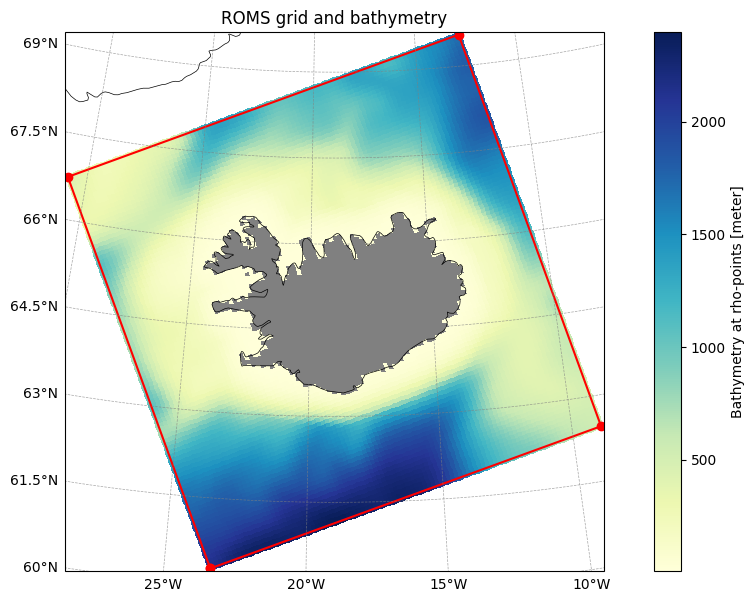

In [19]:
coarse_grid_ETOPO5.plot()

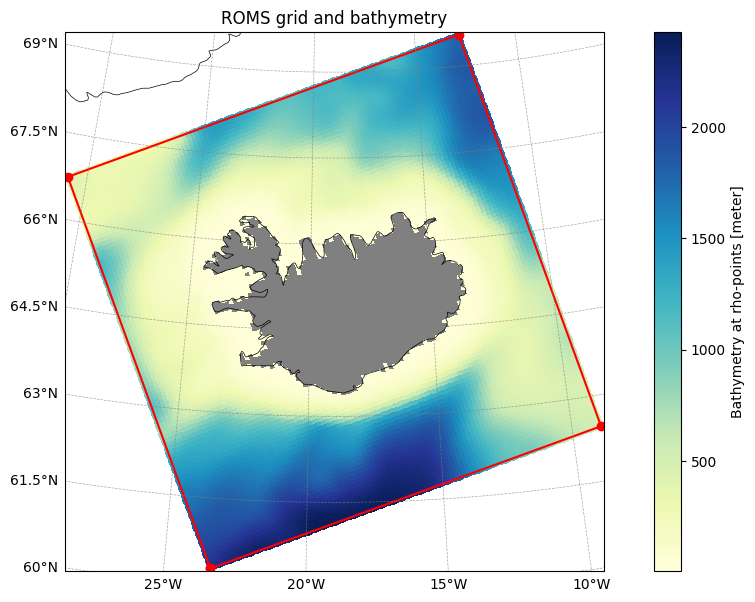

In [20]:
coarse_grid_SRTM15.plot()

Comparing the figures above, we don’t see significant differences in the generated topography fields. The grid is simply too coarse to fully utilize the high-resolution SRTM15 data! To observe more noticeable differences, we need to use a finer resolution grid.

Let's do that! Next, we generate two fine-resolution grids with a horizontal resolution of 800km/5000 = 0.16km: one regridded from the ETOPO5 data and the other from the SRTM15 data.

In [21]:
%%time

fine_grid = Grid(nx=5000, ny=5000, **iceland_kwargs, verbose=True)

INFO - === Creating the horizontal grid ===
INFO - Total time: 35.039 seconds
INFO - ========================================================================================================
INFO - === Creating the mask ===
INFO - Total time: 30.219 seconds
INFO - ========================================================================================================
INFO - === Generating the topography using ETOPO5 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.111 seconds
INFO - Regridding the topography: 0.770 seconds
INFO - Smoothing the topography globally: 5.446 seconds
INFO - Smoothing the topography locally: 108.282 seconds
INFO - Total time: 114.724 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================

CPU times: user 2min 31s, sys: 29.5 s, total: 3min
Wall time: 3min


In [22]:
%%time

fine_grid_SRTM15 = Grid(
    nx=5000,
    ny=5000,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    **iceland_kwargs,
    verbose=True
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 33.549 seconds
INFO - ========================================================================================================
INFO - === Creating the mask ===
INFO - Total time: 30.357 seconds
INFO - ========================================================================================================
INFO - === Generating the topography using SRTM15 data and hmin = 5.0 meters ===
INFO - Reading the topography data: 0.055 seconds
INFO - Regridding the topography: 1.471 seconds
INFO - Smoothing the topography globally: 4.910 seconds
INFO - Smoothing the topography locally: 98.538 seconds
INFO - Total time: 105.470 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - =========================================

CPU times: user 2min 30s, sys: 18.3 s, total: 2min 48s
Wall time: 2min 50s


The grid and topography generation process took longer this time, but the durations for both cases were quite similar.

Note that most of the time was spent during the local smoothing phase in both cases. The goal of this smoothing is to ensure that the local steepness ratio does not exceed the threshold of 0.2. Because the topography data contains a lot of details for such a fine-resolution grid, the local smoothing required many iterations for smoothing.

Let's take a look at the generated topography fields.

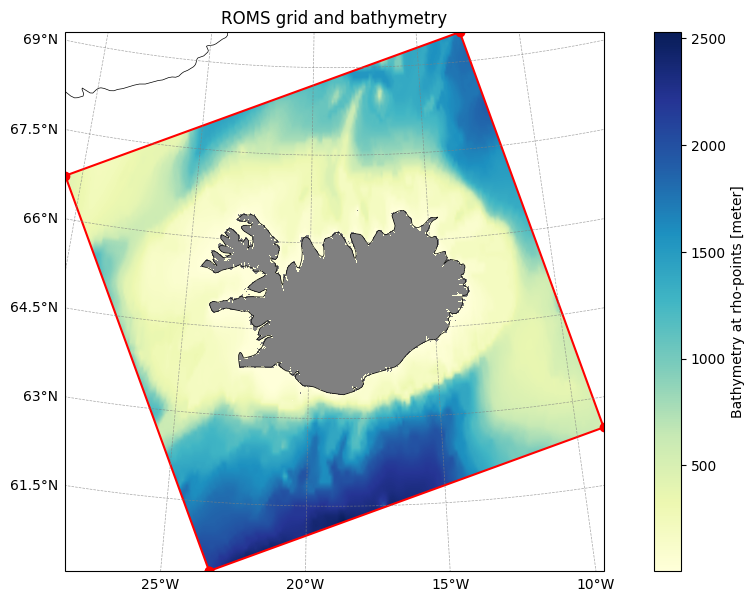

In [23]:
fine_grid.plot()  # grid with ETOPO5 topography

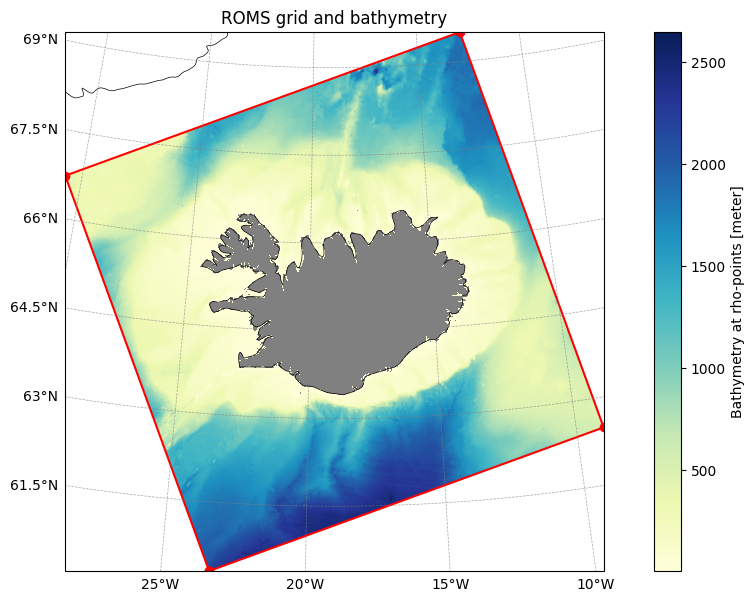

In [24]:
fine_grid_SRTM15.plot()  # grid with SRTM15 topography

The two figures above reveal differences: the topography generated with the SRTM15 data shows a lot more detail. If we moved to an even finer resolution, these differences would become even more pronounced.

### The minimal ocean depth `hmin`

The default for `hmin` is 5 meters. In the above examples, we did not specify the (optional) `hmin` parameter, so it was set to the default value.

In [25]:
fine_grid.hmin

5.0

Let's confirm that the minimum ocean depth is indeed at least 5 meters.

In [26]:
fine_grid.ds["h"].min()

<xarray.DataArray 'h' ()> Size: 8B
array(5.)

We can define a grid with a different `hmin`.

In [27]:
%%time

fine_grid_with_larger_hmin = Grid(
    nx=5000,
    ny=5000,
    **iceland_kwargs,
    verbose=True,
    hmin=10.0,  # Minimum ocean depth in meters (default: 5.0)
)

INFO - === Creating the horizontal grid ===
INFO - Total time: 34.997 seconds
INFO - ========================================================================================================
INFO - === Creating the mask ===
INFO - Total time: 30.434 seconds
INFO - ========================================================================================================
INFO - === Generating the topography using ETOPO5 data and hmin = 10.0 meters ===
INFO - Reading the topography data: 0.114 seconds
INFO - Regridding the topography: 0.824 seconds
INFO - Smoothing the topography globally: 5.671 seconds
INFO - Smoothing the topography locally: 75.702 seconds
INFO - Total time: 82.426 seconds
INFO - ========================================================================================================
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - =========================================

CPU times: user 2min 6s, sys: 19.9 s, total: 2min 26s
Wall time: 2min 28s


In [28]:
fine_grid_with_larger_hmin.ds["h"].min()

<xarray.DataArray 'h' ()> Size: 8B
array(10.)

### Updating topography and `hmin`

When working with a grid that has a large number of grid points, such as `nx` = `ny` = 5000 in the example above, Steps I and II (creating the horizontal grid and land mask) can be quite time-consuming: it took about 40 + 30 = 70 seconds! If you simply want to repeat Step III, which involves updating the topography and/or `hmin`, but you would like to keep the same horizontal grid and mask, you can skip Steps I and II. This can be easily achieved using the `.update_topography` method. In the next cell, we take our fine resolution grid with ETOPO5 topography, and update it with SRTM15 topography and a larger `hmin` of 10 meters.

In [29]:
%%time

fine_grid.update_topography(
    hmin=10.0,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
    verbose=True,
)

INFO - === Generating the topography using SRTM15 data and hmin = 10.0 meters ===
INFO - Reading the topography data: 0.067 seconds
INFO - Regridding the topography: 1.306 seconds
INFO - Smoothing the topography globally: 5.571 seconds
INFO - Smoothing the topography locally: 63.678 seconds
INFO - Total time: 71.266 seconds
INFO - ========================================================================================================


CPU times: user 57.2 s, sys: 12.7 s, total: 1min 9s
Wall time: 1min 11s


From the printed output, you can see that Steps I, II, and IV were skipped as desired. The following confirms that the `topography_source` and `hmin` were indeed updated.

In [30]:
fine_grid

Grid(nx=5000, ny=5000, size_x=800, size_y=800, center_lon=-19, center_lat=65, rot=20, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=10.0, verbose=True, straddle=False)

## The vertical coordinate system

[Here](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system) you can find an overview of the steps involved in creating the vertical coordinate system.

To prepare the vertical coordinate system, `ROMS-Tools` needs the following parameters:

* `N`: the number of vertical layers (default: 100)
* `theta_s`: the surface control parameter (default: 5.0)
* `theta_b`: the bottom control parameter (default: 2.0)
* `hc`: the critical depth in meters (default: 300.0)

In the above examples, we did not specify the last three parameters, so they were set to the default values.

In [31]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [32]:
print(f"N: {grid.N}, theta_s: {grid.theta_s}, theta_b: {grid.theta_b}, hc: {grid.hc}")

N: 100, theta_s: 5.0, theta_b: 2.0, hc: 300.0


Among the [steps involved in generating the vertical coordinate system](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system), only the first two are executed during grid generation. 
Specifically, the `grid.ds` object contains the vertical stretched coordinates (`sigma_r` and `sigma_w`), as well as the vertical stretching functions (`Cs_r` and `Cs_w`).

In [33]:
grid.ds

<xarray.Dataset> Size: 7MB
Dimensions:       (eta_rho: 252, xi_rho: 252, xi_u: 251, eta_v: 251,
                   eta_coarse: 127, xi_coarse: 127, s_rho: 100, s_w: 101)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 508kB 57.2 57.19 ... 64.59 64.51
    lon_rho       (eta_rho, xi_rho) float64 508kB 315.8 316.0 ... 22.76 22.85
    lat_u         (eta_rho, xi_u) float64 506kB 57.19 57.19 ... 64.63 64.55
    lon_u         (eta_rho, xi_u) float64 506kB 315.9 316.1 316.2 ... 22.71 22.8
    lat_v         (eta_v, xi_rho) float64 506kB 57.24 57.24 ... 64.57 64.49
    lon_v         (eta_v, xi_rho) float64 506kB 315.8 316.0 ... 22.67 22.76
    lat_coarse    (eta_coarse, xi_coarse) float64 129kB 57.15 57.14 ... 64.49
    lon_coarse    (eta_coarse, xi_coarse) float64 129kB 315.7 316.1 ... 22.99
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 508kB -0.05782 -0.05782 ... -1.104
    f             (eta_rho, xi_rho) float64 508kB 0.0001222 ... 0.0001313
    pm            (eta_rho, xi_rho) float64 508kB 0.0001013 ... 0.0001013
    pn            (eta_rho, xi_rho) float64 508kB 0.000102 0.000102 ... 0.000102
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 254kB 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 65kB 1 1 1 1 1 1 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 508kB 3.412e+03 3.412e+03 ... 5.0
    sigma_r       (s_rho) float32 400B -0.995 -0.985 -0.975 ... -0.015 -0.005
    Cs_r          (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    sigma_w       (s_w) float32 404B -1.0 -0.99 -0.98 -0.97 ... -0.02 -0.01 0.0
    Cs_w          (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:               ROMS grid created by ROMS-Tools
    roms_tools_version:  2.6.3.dev49+g5688aca
    size_x:              2500
    size_y:              2500
    center_lon:          -15
    center_lat:          65
    rot:                 -30
    topography_source:   SRTM15
    hmin:                5.0
    theta_s:             5.0
    theta_b:             2.0
    hc:                  300.0

Text(0.5, 1.0, 'Vertical stretching function at rho-points')

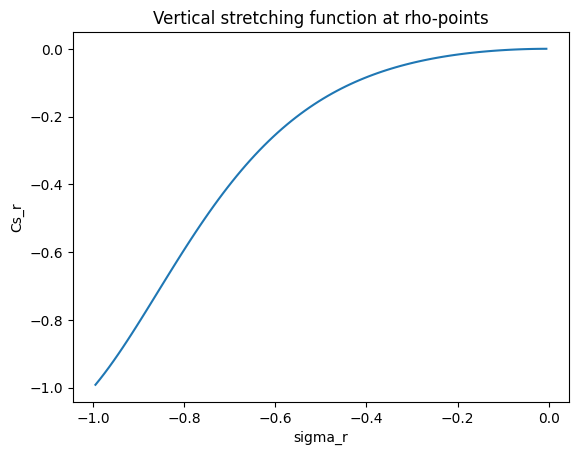

In [34]:
import matplotlib.pyplot as plt

plt.plot(grid.ds.sigma_r, grid.ds.Cs_r)
plt.xlabel("sigma_r")
plt.ylabel("Cs_r")
plt.title("Vertical stretching function at rho-points")

The vertical stretching functions, along with the topography, are used to compute the depth of the layers and interfaces, as described in step 3 of [this list](https://roms-tools.readthedocs.io/en/latest/methods.html#vertical-coordinate-system). Since this step can be computationally expensive and memory-intensive for large grids (e.g., `nx` = `ny` = 5000 as in one of the examples above), `ROMS-Tools` does not compute the layer depths and interfaces during grid generation. Instead, they are calculated later, when needed for generating initial conditions or boundary forcing.

However, if you wish to visualize the layer depths during the grid generation, they can be computed and plotted as demonstrated in the next section.

### Plotting the vertical coordinate system

You can visualize the vertical coordinate system from different perspectives using the `.plot_vertical_coordinate` method. Let's begin by examining the depth of the different layers.

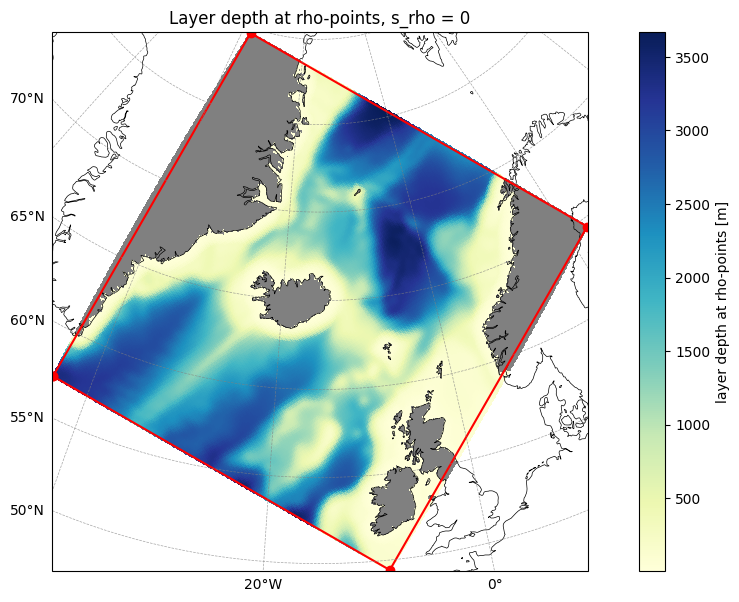

In [35]:
grid.plot_vertical_coordinate(s=0)  # depth of the lowermost layer at rho-points

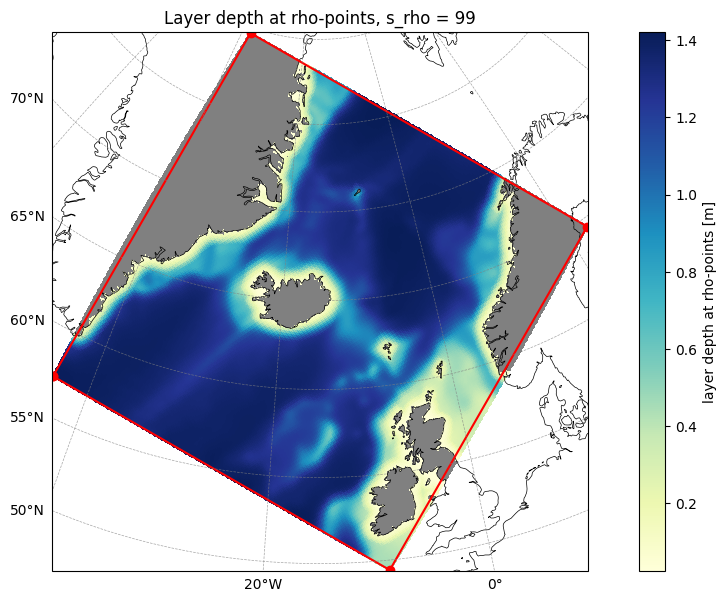

In [36]:
grid.plot_vertical_coordinate(s=-1)  # depth of the uppermost layer at rho-points

We are now interested in a vertical view of our layers. We can look at a transect by slicing through the `eta` or `xi` dimensions.

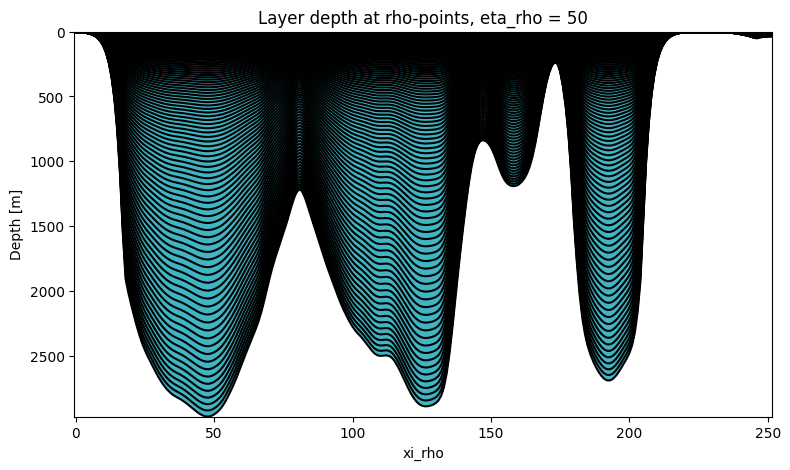

In [37]:
grid.plot_vertical_coordinate(eta=50)

The upper ocean layers are so densely packed that the lines converge and become indistinguishable. 

### Vertical coordinate system parameters

To examine the vertical coordinate system parameters, we begin with a control grid containing just 20 vertical layers—small enough to clearly distinguish variations in the vertical plots.

In [38]:
fixed_grid_parameters = {
    "nx": 100,
    "ny": 100,
    "size_x": 1800,
    "size_y": 2400,
    "center_lon": -21,
    "center_lat": 61,
    "rot": 20,
    "N": 20,
}

In [39]:
control_grid = Grid(
    **fixed_grid_parameters,
    theta_s=5.0,
    theta_b=2.0,
    hc=300.0,
)

In [40]:
control_grid

Grid(nx=100, ny=100, size_x=1800, size_y=2400, center_lon=-21, center_lat=61, rot=20, N=20, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'ETOPO5'}, hmin=5.0, verbose=False, straddle=False)

We will now change the vertical coordinate system parameters `theta_s`, `theta_b`, and `hc`, and see what effect this has.

#### Critical depth

The critical depth `hc` sets the transition between flat $z$-levels in the upper ocean and terrain-following sigma-levels below. Usually we want to choose `hc` to be comparable with the expected depth of the pycnocline. That being said, let's experiment with the `hc` parameter. 

In [41]:
grid_with_large_critical_depth = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=control_grid.theta_b,
    hc=1000.0,
)

grid_with_small_critical_depth = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=control_grid.theta_b,
    hc=50.0,
)

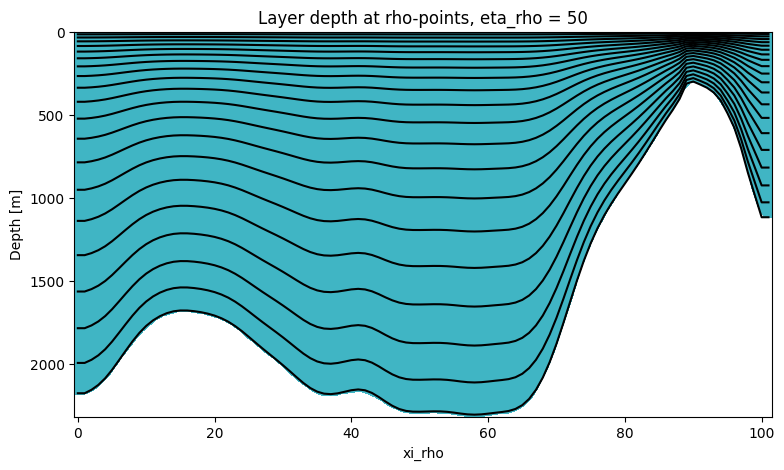

In [42]:
control_grid.plot_vertical_coordinate(eta=50)

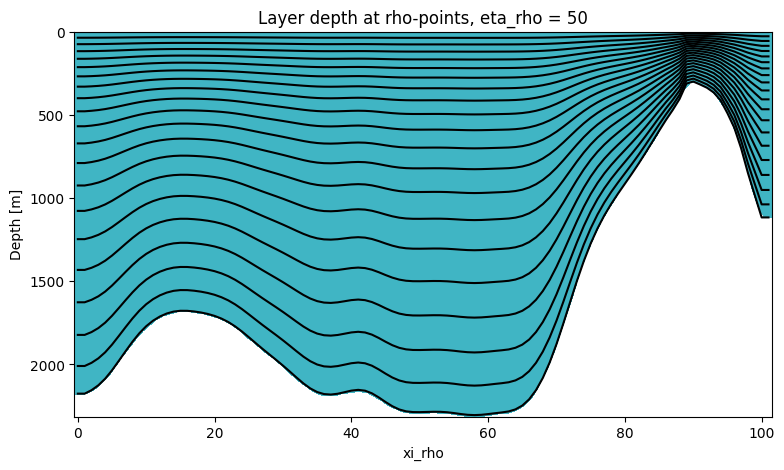

In [43]:
grid_with_large_critical_depth.plot_vertical_coordinate(eta=50)

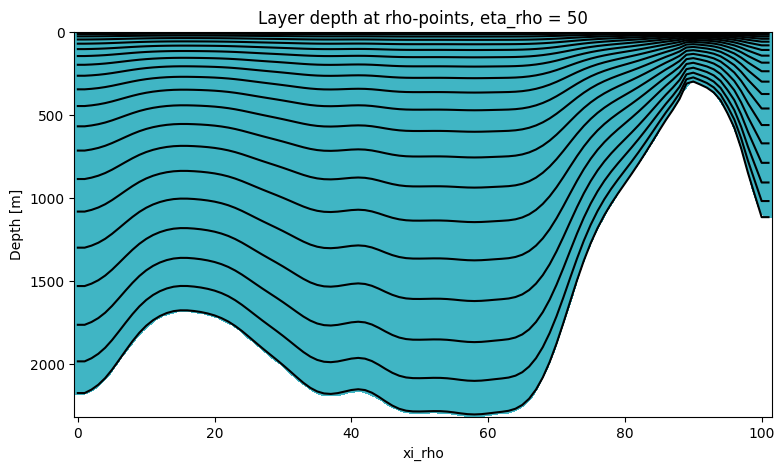

In [44]:
grid_with_small_critical_depth.plot_vertical_coordinate(eta=50)

When comparing the three plots above, we observe that 

* increasing `hc` results in a higher proportion of the upper ocean having nearly evenly spaced levels. It's important to note that despite setting `hc` to 1000m in the second plot, the evenly spaced levels do not extend all the way down to 1000m. However, in deeper ocean regions (visible in the left part of the plot), we approach this depth threshold more closely.
* reducing `hc` leads to a smaller proportion of the upper ocean having nearly evenly spaced levels.

#### Surface and bottom control parameters

The surface control parameter `theta_s` and bottom control parameter `theta_b` determine how much the vertical grid is stretched near the surface and bottom, respectively. Let's change these two parameters and see what happens.

In [45]:
grid_with_large_theta_s = Grid(
    **fixed_grid_parameters,
    theta_s=10.0,
    theta_b=control_grid.theta_b,
    hc=control_grid.hc
)

grid_with_small_theta_s = Grid(
    **fixed_grid_parameters,
    theta_s=2.0,
    theta_b=control_grid.theta_b,
    hc=control_grid.hc
)

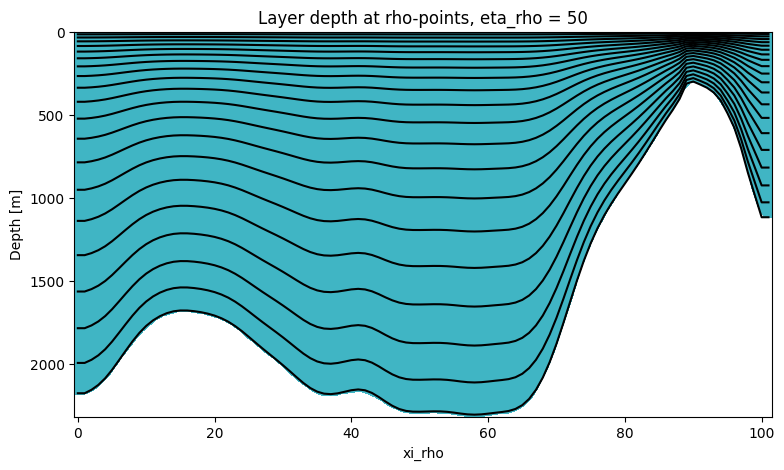

In [46]:
control_grid.plot_vertical_coordinate(eta=50)

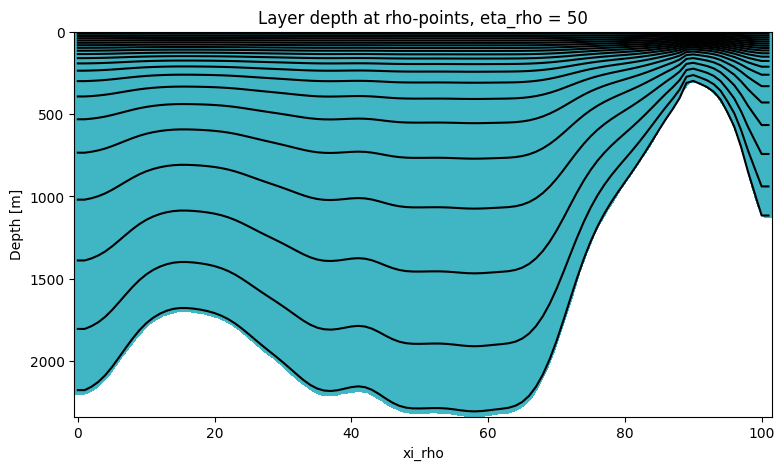

In [47]:
grid_with_large_theta_s.plot_vertical_coordinate(eta=50)

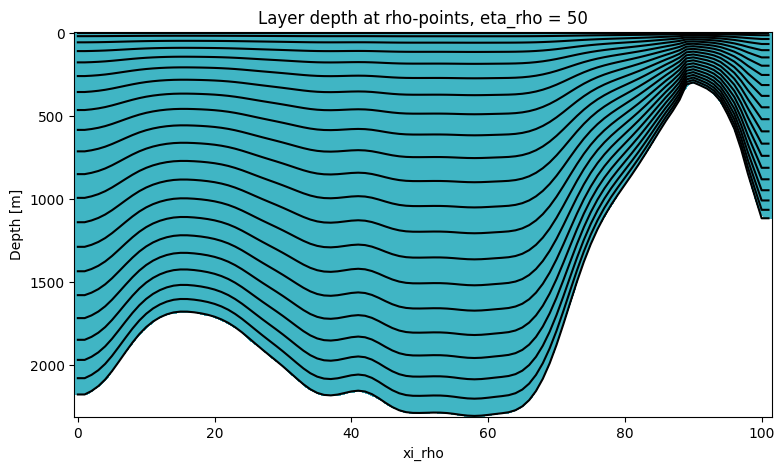

In [48]:
grid_with_small_theta_s.plot_vertical_coordinate(eta=50)

When comparing the three plots above, we can see that 

* increasing `theta_s` leads to a refinement of the vertical grid near the surface,
* reducing `theta_s` leads to coarsening of the vertical grid near the surface.

We can play a similar game with the bottom control parameter `theta_b`.

In [49]:
grid_with_large_theta_b = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=6.0,
    hc=control_grid.hc
)

grid_with_small_theta_b = Grid(
    **fixed_grid_parameters,
    theta_s=control_grid.theta_s,
    theta_b=0.5,
    hc=control_grid.hc
)

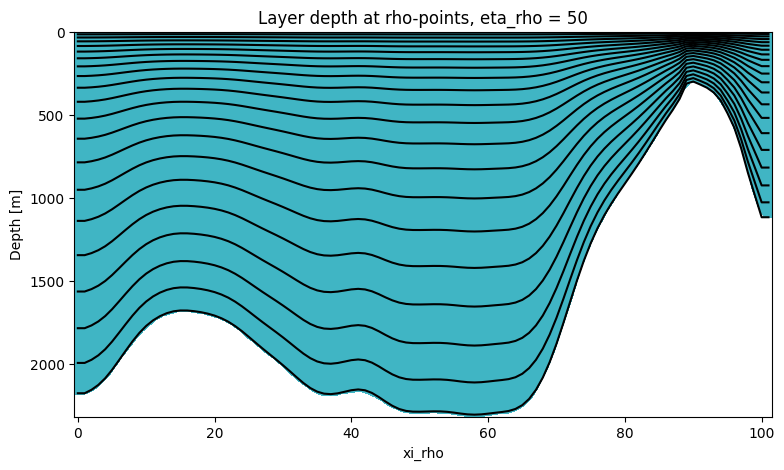

In [50]:
control_grid.plot_vertical_coordinate(eta=50)

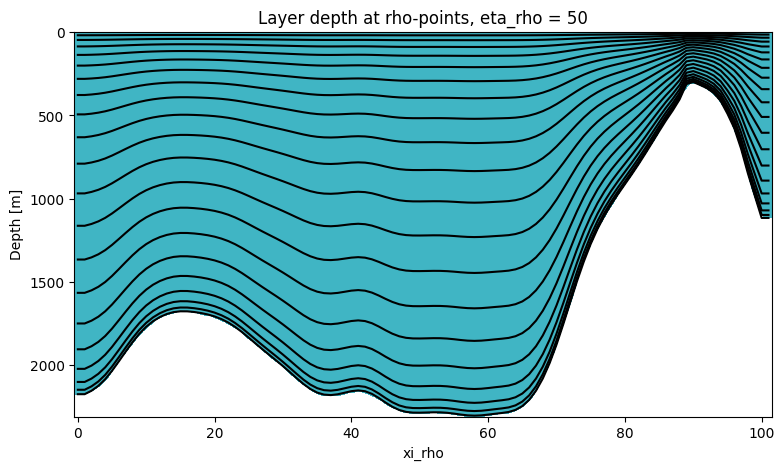

In [51]:
grid_with_large_theta_b.plot_vertical_coordinate(eta=50)

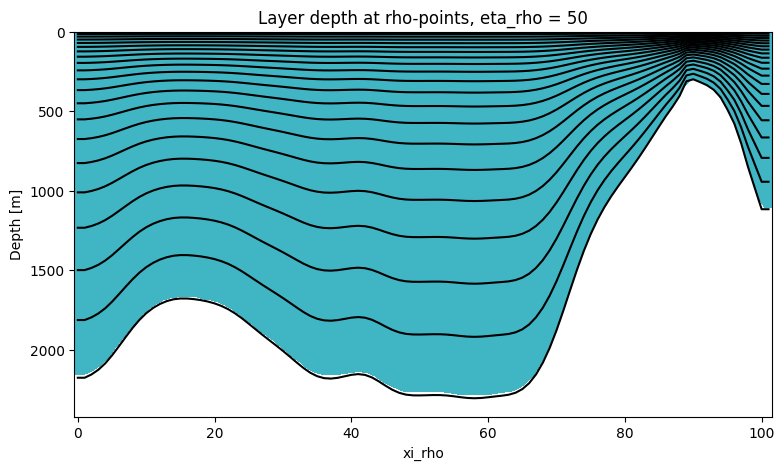

In [52]:
grid_with_small_theta_b.plot_vertical_coordinate(eta=50)

Again, comparing the three plots above, we can see that 

* increasing `theta_b` leads to a refinement of the vertical grid near the bottom,
* reducing `theta_b` leads to coarsening of the vertical grid near the bottom.

### Updating the vertical coordinate system

If you want to update the vertical coordinate system but would like to keep the same horizontal grid and topography, you can skip Steps I, II, and III. 
This can be easily achieved using the `.update_vertical_coordinate` method.  Let's update the grid that we created at the very beginning of this notebook.

In [53]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=100, theta_s=5.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

In [54]:
grid.update_vertical_coordinate(N=10, theta_s=1.0, verbose=True)

INFO - === Preparing the vertical coordinate system using N = 10, theta_s = 1.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.004 seconds
INFO - ========================================================================================================


In the cell above, we regenerated the vertical coordinate system of our original grid, but this time only with 10 layers and `theta_s = 1.0`.

In [55]:
grid

Grid(nx=250, ny=250, size_x=2500, size_y=2500, center_lon=-15, center_lat=65, rot=-30, N=10, theta_s=1.0, theta_b=2.0, hc=300.0, topography_source={'name': 'SRTM15', 'path': '/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc'}, hmin=5.0, verbose=True, straddle=True)

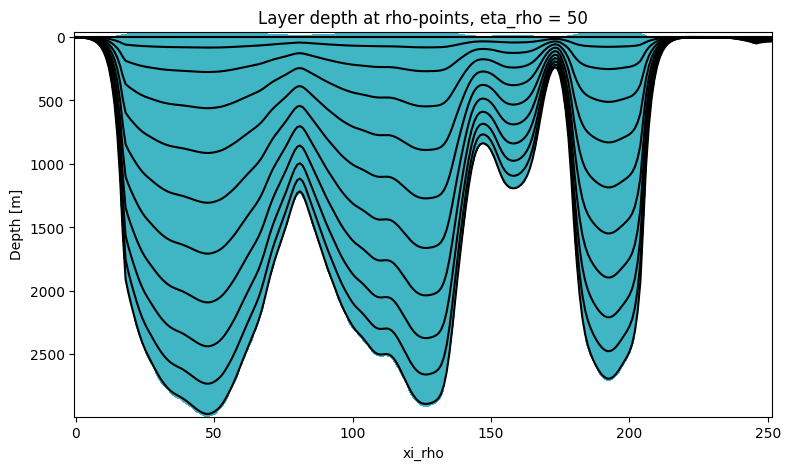

In [56]:
grid.plot_vertical_coordinate(eta=50)